### Análise da Mídia Social Twitter: contas @netflix e @NetflixBrasil e #winx
##### Este trabalho analisa a rede social Twitter utilizando sua API, as contas @netflix e @NetflixBrasil e a #winx, a fim de levantar o impacto da empresa Netflix tem no país e no mundo em relação ao anúncio de uma nova produção em cartaz. É pretendido analisar questões como tempo demandado para alcançar 1.000 tweets, polaridade e outras _hashtags_ que acompanham a #winx.

## Questões de Pesquisa
1) Quanto tempo levou para a #winx alcançar 200 tweets nas contas da @netflix e @NetflixBrasil?

2) Durante o primeiro dia, em suma, sobre o que os tweets falavam da #winx? Quais foram as palavras que mais apareceram?

3) Quais outras hashtags apareceram em conjunto da #winx durante o primeiro dia?

4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

6) Qual a média de sentimento dos tweets que contam com a #winx?

7) Quais outras hashtags podem ser encontradas nos tweets que falam sobre #winx?

> Extra

8) Quais são os retweets mais populares que falam sobre #winx?

### Importações de bibliotecas

In [8]:
import tweepy
import twitter
from textblob import TextBlob as tb
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### Definição das figuras

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Configuração das credenciais da API do Twitter

In [10]:
config = pd.read_csv("../keys twitter.csv", sep=";")
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

config2 = pd.read_csv("../keys twitter_adm.csv", sep=";")
CONSUMER_KEY = config2['twitterApiKey'][0]
CONSUMER_SECRET = config2['twitterApiSecret'][0]
OAUTH_TOKEN = config2['twitterApiAccessToken'][0]
OAUTH_TOKEN_SECRET = config2['twitterApiAccessTokenSecret'][0]

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

### Autenticação

In [11]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

### Conta(s) em foco

In [12]:
account1 = "netflix"
account2 = "NetflixBrasil"

In [13]:
tweets1 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account1, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(2000);

tweets2 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account2, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(2000);

In [14]:
#Account1
df1 = pd.DataFrame(data=[tweet.text for tweet in tweets1], columns=['Tweet'])

#Account2
df2 = pd.DataFrame(data=[tweet.text for tweet in tweets2], columns=['Tweet'])


In [15]:
pd.set_option('display.max_colwidth', 240)

print('Netflix')
df1.head()

Netflix


Tweet
0                                                                          RT @thedanieb: Can’t wait to watch Ma Rainey’s Black Bottom Friday!!
1                                                                                         RT @JayPharoah: Let's goo🙏🏾🙏🏾 https://t.co/Pb6Ii9zEs0
2                                                   RT @GiaPeppers: Chadwick is incredible in this. The entire cast is. https://t.co/NeqOVKxjkW
3  RT @iamjimkelly: Chadwick Boseman legit learned how to play the trumpet 🎺 for his role in Ma Rainey's Black Bottom. His acting genius. 😭 ht…
4                                                            how are they so perfect and so talented? \n\n(🎥: The Prom) https://t.co/Ykd0bG0MVH

In [10]:
print('Netflix Brasil')
df2.head()

Netflix Brasil


Tweet
0  Mistério, crime, folclore brasileiro: minha nova série original com o @marcopigossi e a @alenegrini tem tudo. Criad… https://t.co/P3xMNCraXK
1                                                            Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.
2                                                                                                           Pera aí ✋🤔🐝 https://t.co/lvQkll4OZ6
3  Vinte e um estudantes desaparecem misteriosamente. Vinte anos depois, a verdade perturbadora sobre o caso vem à ton… https://t.co/jeQH0WElFK
4                The boss is on / ¡La Patroa está on! / A patroa está ON!\nAnitta: Made In Honório já está disponível.… https://t.co/0KZuo4D0q4

### Análise de Sentimento
#### Funções de Subjetividade e Polaridade

In [57]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [58]:
# Aplicando funções nos dataframes

df1['Subjectivity'] = df1['Tweet'].apply(getTextSubjectivity)
df1['Polarity'] = df1['Tweet'].apply(getTextPolarity)

df2['Subjectivity'] = df2['Tweet'].apply(getTextSubjectivity)
df2['Polarity'] = df2['Tweet'].apply(getTextPolarity)


In [59]:
# Função para categorizar Tweets em Positivos, Negativos e Neutros.
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [60]:
# Aplicando função de categorização nos dataframes
df1['Score'] = df1['Polarity'].apply(getTextAnalysis)

df2['Score'] = df2['Polarity'].apply(getTextAnalysis)

In [61]:
df1.head()

Tweet  \
0    RT @strongblacklead: "She's one of the greats, of all time. It's an honor for me to find roles that give all of us the chance to see how br…   
1    RT @NetflixFilm: Cannot wait for the world to see MA RAINEY’S BLACK BOTTOM in two days. Every scene of this film is a lush, rich work of ar…   
2     Tiny Pretty Things cast trained dancers in lead roles resulting in some seriously sensational routines — like this… https://t.co/RNvetecDDM   
3    RT @Most: Zazz aside, at the center of Ryan Murphy’s THE PROM lies a true story that's just as fantastical as the movie. Meet the inspirati…   
4  After all these years, it is still thrilling to watch Meryl Streep just absolutely crush a monologue. \n\n(📽️: The Pr… https://t.co/AcbIsKz3Mr   

   Subjectivity  Polarity     Score  
0      0.000000  0.000000   Neutral  
1      0.494444  0.102778  Positive  
2      0.722222  0.305556  Positive  
3      0.416667  0.250000  Positive  
4      0.950000  0.225000  Positive

In [62]:
df2.head()

Tweet  \
0  Mistério, crime, folclore brasileiro: minha nova série original com o @marcopigossi e a @alenegrini tem tudo. Criad… https://t.co/P3xMNCraXK   
1                                                            Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.   
2                                                                                                           Pera aí ✋🤔🐝 https://t.co/lvQkll4OZ6   
3  Vinte e um estudantes desaparecem misteriosamente. Vinte anos depois, a verdade perturbadora sobre o caso vem à ton… https://t.co/jeQH0WElFK   
4                The boss is on / ¡La Patroa está on! / A patroa está ON!\nAnitta: Made In Honório já está disponível.… https://t.co/0KZuo4D0q4   

   Subjectivity  Polarity     Score  
0          0.75     0.375  Positive  
1          0.50     0.500  Positive  
2          0.00     0.000   Neutral  
3          0.00     0.000   Neutral  
4          0.00     0.000   Neutral

### Limpeza de dados

In [63]:
# Cleaning the tweets

def limparTweet(txt):
    # Remove mentions
    # txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    # txt = re.sub(r'#', '', txt)
    # Remove retweets:
    # txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt

In [64]:
df1['Tweet'] = df1['Tweet'].apply(limparTweet)

df2['Tweet'] = df2['Tweet'].apply(limparTweet)


### Removendo linhas vazias 

In [68]:
df1 = df1.drop(df1[df1['Tweet'] == ''].index)

df2 = df2.drop(df2[df2['Tweet'] == ''].index)


In [18]:
import json

# Set this variable to a trending topic,  or anything else for that matter. 

query = '#winx' 

count = 200

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets
search_results = twitter_api.search.tweets(q=query, count=count)

print (type(search_results))
print()
print (json.dumps(search_results, indent=2))

<class 'twitter.api.TwitterDictResponse'>

{
  "statuses": [
    {
      "created_at": "Fri Dec 18 12:11:28 +0000 2020",
      "id": 1339906121834897410,
      "id_str": "1339906121834897410",
      "text": "RT @SinfulHime: Who cares about those fairy losers? \nYou didn't forget us, did you? #winx https://t.co/2bZYhJskNy",
      "truncated": false,
      "entities": {
        "hashtags": [
          {
            "text": "winx",
            "indices": [
              84,
              89
            ]
          }
        ],
        "symbols": [],
        "user_mentions": [
          {
            "screen_name": "SinfulHime",
            "name": "SinfulHime\u2726",
            "id": 2575114279,
            "id_str": "2575114279",
            "indices": [
              3,
              14
            ]
          }
        ],
        "urls": [],
        "media": [
          {
            "id": 1339410627656355842,
            "id_str": "1339410627656355842",
            "indices": [
     

### Análise de Dados

#### 1) Em suma, sobre os tweets da conta @netflix, quais foram as palavras que mais apareceram?

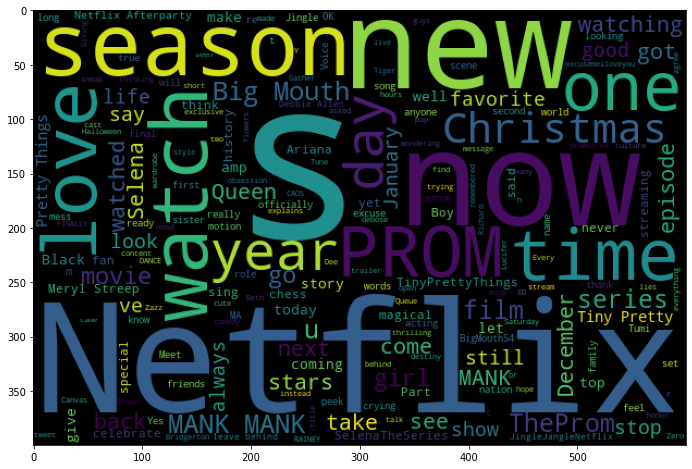

In [105]:
# Creating a word cloud

words = ' '.join([tweet for tweet in df1['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 1) Em suma, sobre os tweets da conta @NetflixBrasil, quais foram as palavras que mais apareceram?

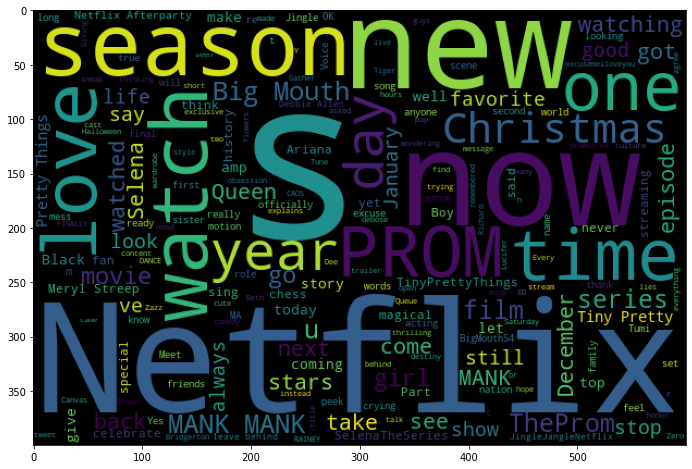

In [105]:
# Creating a word cloud

words = ' '.join([tweet for tweet in df1['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 3) Quais outras hashtags apareceram em conjunto da #winx?

In [30]:
statuses = pd.DataFrame(search_results['statuses'])
statuses.head()

created_at                   id               id_str  \
0  Fri Dec 18 12:11:28 +0000 2020  1339906121834897410  1339906121834897410   
1  Fri Dec 18 12:09:46 +0000 2020  1339905694321897472  1339905694321897472   
2  Fri Dec 18 12:02:25 +0000 2020  1339903842847223808  1339903842847223808   
3  Fri Dec 18 12:01:17 +0000 2020  1339903559635234818  1339903559635234818   
4  Fri Dec 18 11:57:33 +0000 2020  1339902618324377600  1339902618324377600   

                                                                                                                                text  \
0                 RT @SinfulHime: Who cares about those fairy losers? \nYou didn't forget us, did you? #winx https://t.co/2bZYhJskNy   
1  RT @momoiro_lys: Decided I should take a break from 2020 and make 8 year old me happy🧚‍♀️🌱#winx #winxclub https://t.co/WmvMDRl0vs   
2                                RT @mackenziedravis: i’m gay so i have every right to make things gay #winx https://t.co/aLudkBAfeq   
3                            RT @hairaconda: Also auditioning for the role of Aisha/Layla #Winxnetflix #winx https://t.co/kmONuzarFL   
4                                                          RT @queirogis: B L O O M\n#WINX #winxclub  #myart https://t.co/xiLlUp5VXb   

   truncated  \
0      False   
1      False   
2      False   
3      False   
4      False   

                                                                                                                                                                                                                                          entities  \
0  {'hashtags': [{'text': 'winx', 'indices': [84, 89]}], 'symbols': [], 'user_mentions': [{'screen_name': 'SinfulHime', 'name': 'SinfulHime✦', 'id': 2575114279, 'id_str': '2575114279', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 133...   
1  {'hashtags': [{'text': 'winx', 'indices': [90, 95]}, {'text': 'winxclub', 'indices': [96, 105]}], 'symbols': [], 'user_mentions': [{'screen_name': 'momoiro_lys', 'name': '⚜ Lys 🦋', 'id': 990573720065462272, 'id_str': '990573720065462272...   
2  {'hashtags': [{'text': 'winx', 'indices': [70, 75]}], 'symbols': [], 'user_mentions': [{'screen_name': 'mackenziedravis', 'name': 'maxy ‎⧗', 'id': 2244681954, 'id_str': '2244681954', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 13...   
3  {'hashtags': [{'text': 'Winxnetflix', 'indices': [61, 73]}, {'text': 'winx', 'indices': [74, 79]}], 'symbols': [], 'user_mentions': [{'screen_name': 'hairaconda', 'name': 'Santa’s Sally Sagiterrorist 🤶🏽', 'id': 18614074, 'id_str': '1861...   
4  {'hashtags': [{'text': 'WINX', 'indices': [25, 30]}, {'text': 'winxclub', 'indices': [31, 40]}, {'text': 'myart', 'indices': [42, 48]}], 'symbols': [], 'user_mentions': [{'screen_name': 'queirogis', 'name': 'queirogis?', 'id': 303126436...   

                                                                                                                                                                                                                                 extended_entities  \
0  {'media': [{'id': 1339410627656355842, 'id_str': '1339410627656355842', 'indices': [90, 113], 'media_url': 'http://pbs.twimg.com/media/EpaK3o3XEAIKT5W.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EpaK3o3XEAIKT5W.jpg', 'url': 'h...   
1  {'media': [{'id': 1338122465558601730, 'id_str': '1338122465558601730', 'indices': [106, 129], 'media_url': 'http://pbs.twimg.com/media/EpH3SvGXIAIXNhH.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EpH3SvGXIAIXNhH.jpg', 'url': '...   
2  {'media': [{'id': 1339617868217020416, 'id_str': '1339617868217020416', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/EpdHWoHXcAAn8ZA.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EpdHWoHXcAAn8ZA.jpg', 'url': 'ht...   
3  {'media': [{'id': 1339697231029547008, 'id_str': '1339697231029547008', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/EpePiJoXMAAH0qi.jpg', 'media_url_ht

In [31]:
hashtags = pd.DataFrame(statuses['hashtags'])
hashtags

KeyError: 'hashtags'

#### 4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

In [106]:
# netflix
df1_ordenado = df1.sort_values(by ='Polarity', ascending = False)
df1_ordenado.head()

Tweet  \
74            As we celebrate Ryan Murphy’s THE PROM make sure we give Ariana DeBose her flowers!!! An Afro-Puerto Rican actor taking…   
35                                                . is now streaming on  and our episode on how we made “Love Again” is OUT NOW!!! 🤍 …   
59                                  In 2020, there has been a 215% increase in the sale of chess sets.\n\nBeth Harmon would be proud.    
131                                                                                               This is a Natalie () stan account!!    
104  It’s a wonderful life when you’ve got two-day shipping and friends like HOLIDATE co-stars Emma Roberts and Kristin Chenoweth for…   

     Subjectivity  Polarity     Score  
74       0.888889  0.976562  Positive  
35       0.600000  0.976562  Positive  
59       1.000000  0.800000  Positive  
131      0.500000  0.781250  Positive  
104      0.750000  0.750000  Positive

In [107]:
# NetflixBrasil
df2_ordenado = df2.sort_values(by ='Polarity', ascending = False)
df2_ordenado.head()

Tweet  \
130                          Love ❌\nCarinho ❌\nBeijinho ❌\nConchinha ❌\nAssistir uma comédia romântica e dormir sozinha ✅   
1                                       Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.   
0                            Mistério, crime, folclore brasileiro: minha nova série original com o  e a  tem tudo. Criad…    
52   Você só vai estar a salvo da minha nova série coreana de terror, Sweet Home, até dia 18 de dezembro. Depois não tem…    
5              My new series, Anitta: Made In Honório, is now available on  /  for you to binge-watch!\n\nMi nueva serie,…   

     Subjectivity  Polarity     Score  
130      0.600000  0.500000  Positive  
1        0.500000  0.500000  Positive  
0        0.750000  0.375000  Positive  
52       0.650000  0.350000  Positive  
5        0.427273  0.318182  Positive

#### 5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

In [108]:
# netflix
df1_ordenado = df1.sort_values(by ='Polarity', ascending = True)
df1_ordenado.head()

Tweet  \
152                                         [watching Mank with my boyfriend]\n\n[Mank appears on screen]\n\nME: that's mank   
155  [ waiting room]\n\nMe: [chanting] Mank, Mank-\n\nOthers in lobby: Mank, MANK\n\nSecretary: [pounding her clipboard] MA…   
100                                                                           sorry time but this is my person of the year     
63           Give it some ZAZZ \nIs it wrong of me to suggest your Saturday night viewing be ....🤓🌈💜\n\nRainbows, Sparkles,…   
69      Pedro Pascal stars in Prospect, a sci-fi thriller about alien planets, an unlikely alliance, and doing whatever it…    

     Subjectivity  Polarity     Score  
152         1.000    -0.750  Negative  
155         1.000    -0.750  Negative  
100         1.000    -0.500  Negative  
63          0.900    -0.500  Negative  
69          0.625    -0.375  Negative

In [109]:
# NetflixBrasil
df2_ordenado = df2.sort_values(by ='Polarity', ascending = True)
df2_ordenado.head()

Tweet  \
125         Aff, Chiquititas no Top 10? Nunca assistiria isso. \n\nⓘ 𝗙𝗼𝗻𝘁𝗲𝘀 𝗼𝗳𝗶𝗰𝗶𝗮𝗶𝘀 𝗮𝗳𝗶𝗿𝗺𝗮𝗿𝗮𝗺 𝗾𝘂𝗲 𝗶𝘀𝘀𝗼 𝗳𝗼𝗶 𝗳𝗮𝗹𝘀𝗼 𝗲 𝗲𝗻𝗴𝗮𝗻𝗼𝘀𝗼   
61          Aqui se fala, aqui se faz. A nova dublagem de Seven Deadly Sins: A Ira Imperial dos Deuses já está disponível.…    
97      Cara Gente Branca é uma série de ficção que conta histórias reais. Uma delas é a de Reggie Green, um estudante que…    
106  Little Witch Academia é o anime que a gente precisava pra dar uma relaxada: \n\n- Akko é uma bruxinha atrapalhada bus…    
92                                                                                                      Orphan Black (2020)    

     Subjectivity  Polarity     Score  
125      0.500000 -0.250000  Negative  
61       0.400000 -0.200000  Negative  
97       0.300000 -0.200000  Negative  
106      0.500000 -0.187500  Negative  
92       0.433333 -0.166667  Negative

#### 6) Qual a média de sentimento dos tweets que contam com a #winx?

In [97]:
public_tweets = twetterApi.search('#winx')

#Variável que irá armazenar as polaridades
analysis = None

tweets = [] # Lista vazia para armazenar scores
for tweet in public_tweets:
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets.append(polarity)
   
    
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(tweets)))

MÉDIA DE SENTIMENTO: -0.11802083333333332


#### 7) Quais são os retweets mais populares que falam sobre #winx?